# COVARIANCE matrix and eigen vector

- take any sample data points (10x2) - A
- compute the COV matrix of A (2x2)

- take any vector (2x1)

- dot multiply, 
    - mult =  np.dot(COV, any_vec) ... get a point (2x1)
    - check the slope
- keep multiplying ..
    - mult =  np.dot(COV, mult)
    - check the slope
    
    - after a few iterations, the slope does not change!
    - This is the Eigen Vector

In [1]:
import numpy as np

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# select the style of the plot
style.use('ggplot')

%matplotlib inline  

In [2]:
np.set_printoptions(precision=6)

In [2]:
# Consider the matrix of 8 observations each of 2 
# variables, x1 and x2 ; # whose observed values are held in the 2 rows 
# of the array X:

X = np.array([ [ 1, 1,  2,   -1, -1.5, .9,  1.3, -.6, 1.9, 2.2],
               [.5, .8, 1.6, .8,   -1, .9,  -.9,  1,  1.5, 1.7]
             ])

In [3]:
X[0].min(), X[0].max()

(-1.5, 2.2)

In [5]:
# get the Co variance matrix 
COV = np.cov(X)
COV

array([[1.70844444, 0.65133333],
       [0.65133333, 0.89877778]])

In [8]:
# take any vector
any_vec = np.array([[3, -15]]).ravel()
any_vec

array([  3, -15])

multi vector :  [-0.37372014 -0.92754151]  with slope =  2.481915
multi vector :  [-0.75564889 -0.65497691]  with slope =  0.866774
multi vector :  [-0.84636364 -0.53260548]  with slope =  0.629287
multi vector :  [-0.86710283 -0.49812918]  with slope =  0.574475
multi vector :  [-0.8722574  -0.48904705]  with slope =  0.560668
multi vector :  [-0.87357811 -0.48668397]  with slope =  0.557116
multi vector :  [-0.87391947 -0.48607074]  with slope =  0.556196
multi vector :  [-0.87400795 -0.48591163]  with slope =  0.555958
multi vector :  [-0.87403074 -0.48587063]  with slope =  0.555896
multi vector :  [-0.87403673 -0.48585984]  with slope =  0.55588
multi vector :  [-0.87403831 -0.48585702]  with slope =  0.555876
multi vector :  [-0.87403863 -0.48585644]  with slope =  0.555875
Number of iterations =  13


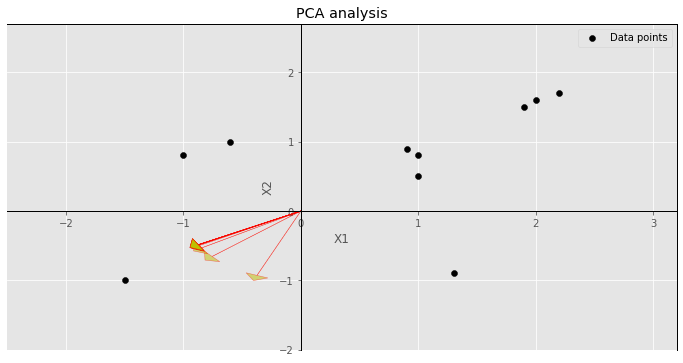

In [9]:
f, ax = plt.subplots(figsize=(12, 6))

# plot the random number
ax.scatter(X[0], X[1], c='k', label='Data points')

ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')

slopes = []
norm_mults  = []

prev_slope = 0
ctr = 1
alpha  = 1

mult      = np.dot(COV, any_vec)
norm_mult = mult / np.sqrt(np.sum(mult**2))
slope     = np.round(norm_mult[1]/norm_mult[0], 6)

while True:
       
    if prev_slope == slope:
        break
        
    prev_slope = slope
       
    slopes.append(slope)
    norm_mults.append(norm_mult)
    
    alpha = alpha - .5
    if alpha < .5:
        alpha =.5
        
    ax.arrow(0, 
             0, 
             norm_mult[0], 
             norm_mult[1], 
             head_width = .2, 
             head_length= .08, 
             fc='y', 
             ec='r',
             alpha = alpha,
             label = 'slope {}'.format(slope));
    
    norm_mult  = np.round(np.dot(COV, norm_mult),    6)
    norm_mult  = norm_mult / np.sqrt(np.sum(norm_mult**2))
    slope      = np.round(norm_mult[1]/norm_mult[0], 6)
    ctr +=1 
      
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('PCA analysis')
ax.set_xlim(X[0].min() -1, X[0].max() + 1)
ax.set_ylim(X[1].min() -1, X[1].max() + 1)
ax.legend();
    
for e in zip(norm_mults, slopes):
    print('multi vector : ', e[0], ' with slope = ', e[1])

print('Number of iterations = ', ctr)

In [10]:
# test for new slope 
norm_mult  = np.round(np.dot(COV, norm_mult),    6)
norm_mult  = norm_mult / np.sqrt(np.sum(norm_mult**2))
slope      = np.round(norm_mult[1]/norm_mult[0], 6)

print(norm_mult)
print(slope)

[-0.87403883 -0.48585607]
0.555875
